##Project: Music Genre Classification using Machine Learning
          
 Niyat Kahsay & Marwah Faraj
 Summer 2025

Description:

This project aims to automatically classify songs into genres based on audio features provided in the Spotify 1.2M Songs Dataset. The workflow includes data exploration, preprocessing, model building, evaluation, and visualization.

Purpose:

Apply supervised learning techniques on real-world audio data
Explore audio feature-based genre classification
Build a portfolio-ready project demonstrating practical machine learning skills

## Import Libraries

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import mode
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Load Data


In [19]:
import pandas as pd
data = pd.read_csv('/content/spotify_songs.csv')
data.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


#Data Exploration

In [20]:
print(data.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [22]:
data.describe(include = "all")

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833,32828,32828,32833.000000,32833,32828,32833,32833,32833,32833,...,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
unique,28356,23449,10692,NaN,22545,19743,4530,449,471,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,NaN,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,22,161,NaN,42,139,270,308,247,6043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,42.477081,NaN,NaN,NaN,NaN,NaN,NaN,...,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,NaN,NaN,NaN,24.984074,NaN,NaN,NaN,NaN,NaN,NaN,...,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000


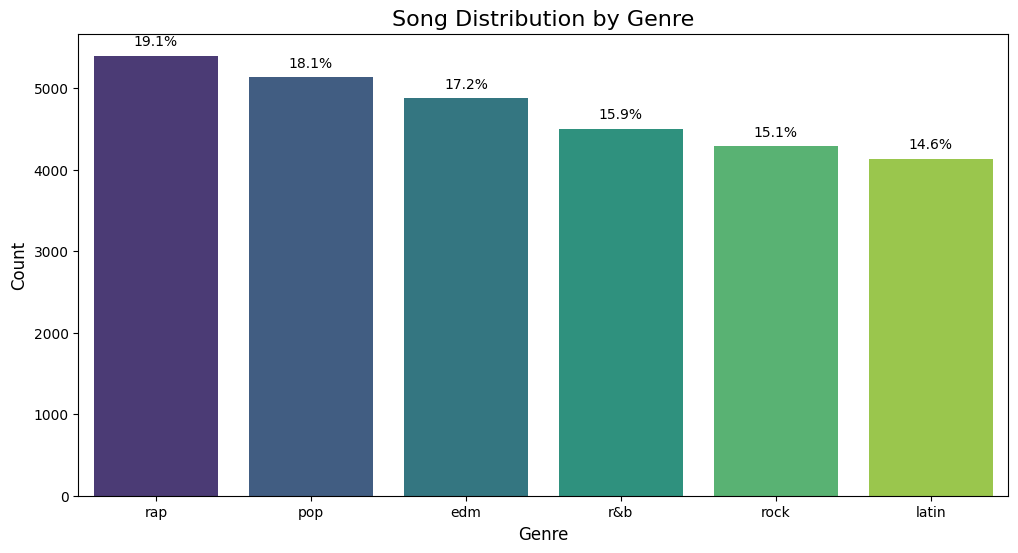

In [41]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# Genre Distribution Visualization
plt.figure(figsize=(12, 6))
genre_counts = data['playlist_genre'].value_counts()
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Song Distribution by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentage labels
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=10)
plt.show()


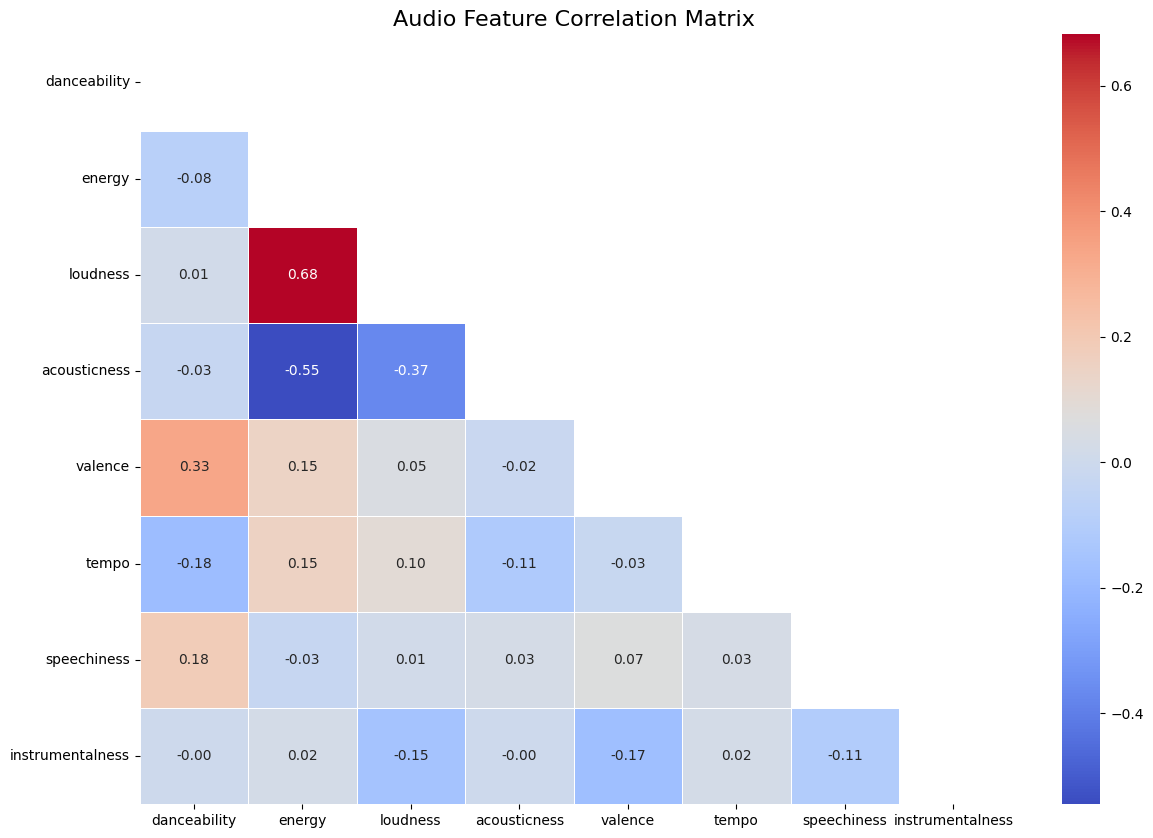

In [42]:

# Feature Correlation Matrix
plt.figure(figsize=(14, 10))
audio_features = ['danceability', 'energy', 'loudness',
                 'acousticness', 'valence', 'tempo',
                 'speechiness', 'instrumentalness']
corr_matrix = data[audio_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap="coolwarm", linewidths=0.5)
plt.title("Audio Feature Correlation Matrix", fontsize=16)
plt.show()

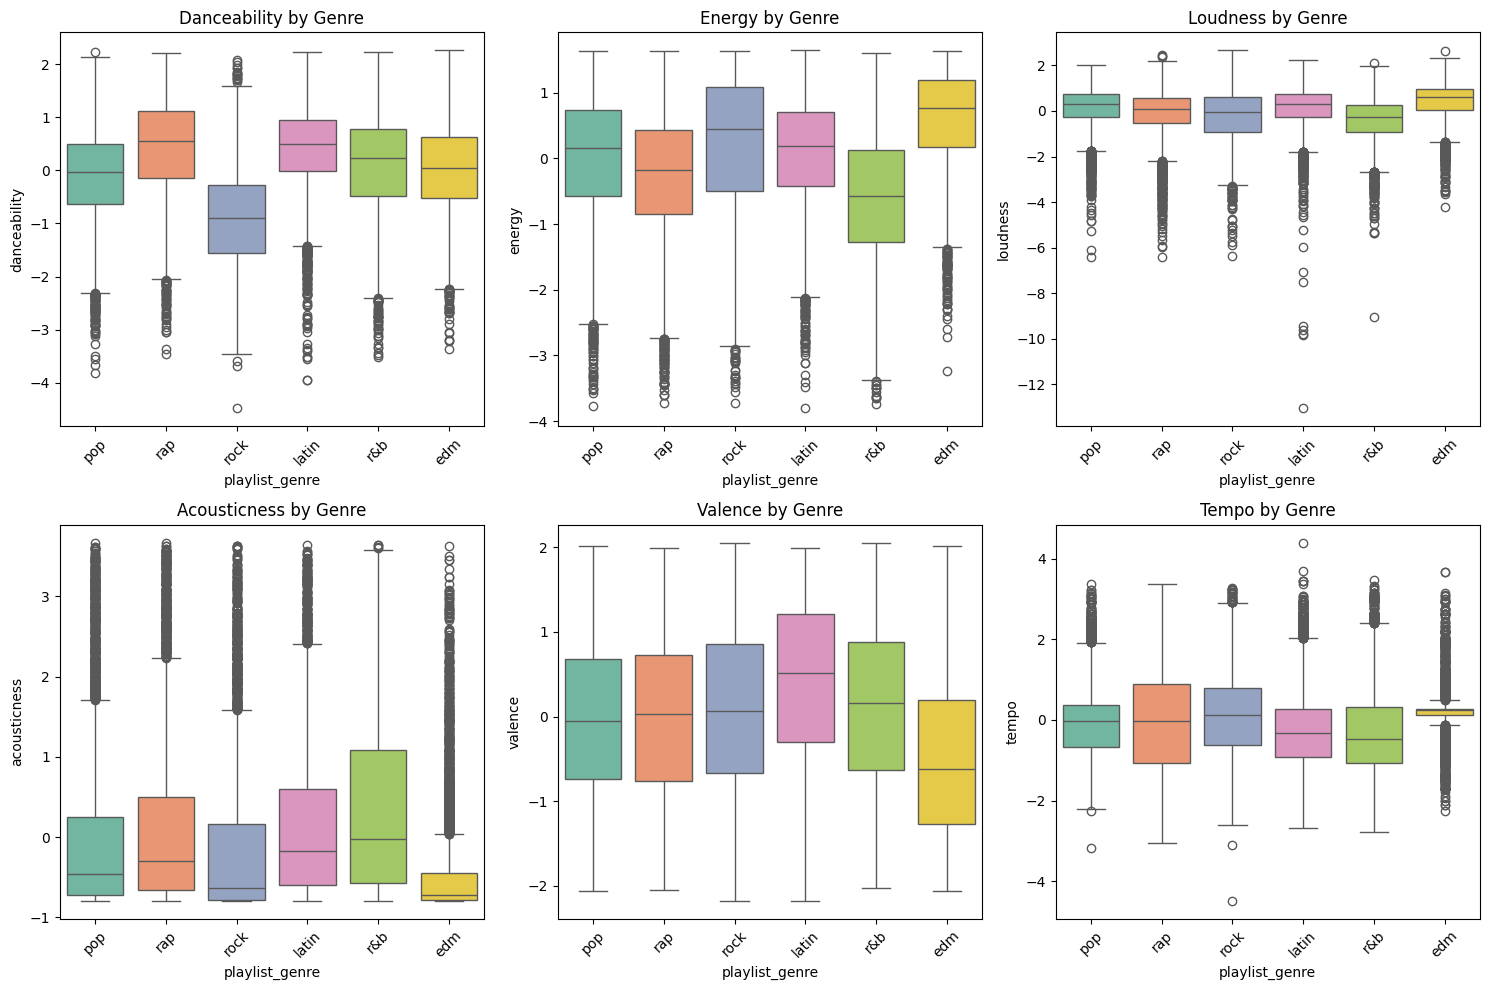

In [46]:
# Feature Distribution by Genre (Boxplot)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='playlist_genre', y=feature, data=data, palette="Set2")
    plt.title(f'{feature.capitalize()} by Genre', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

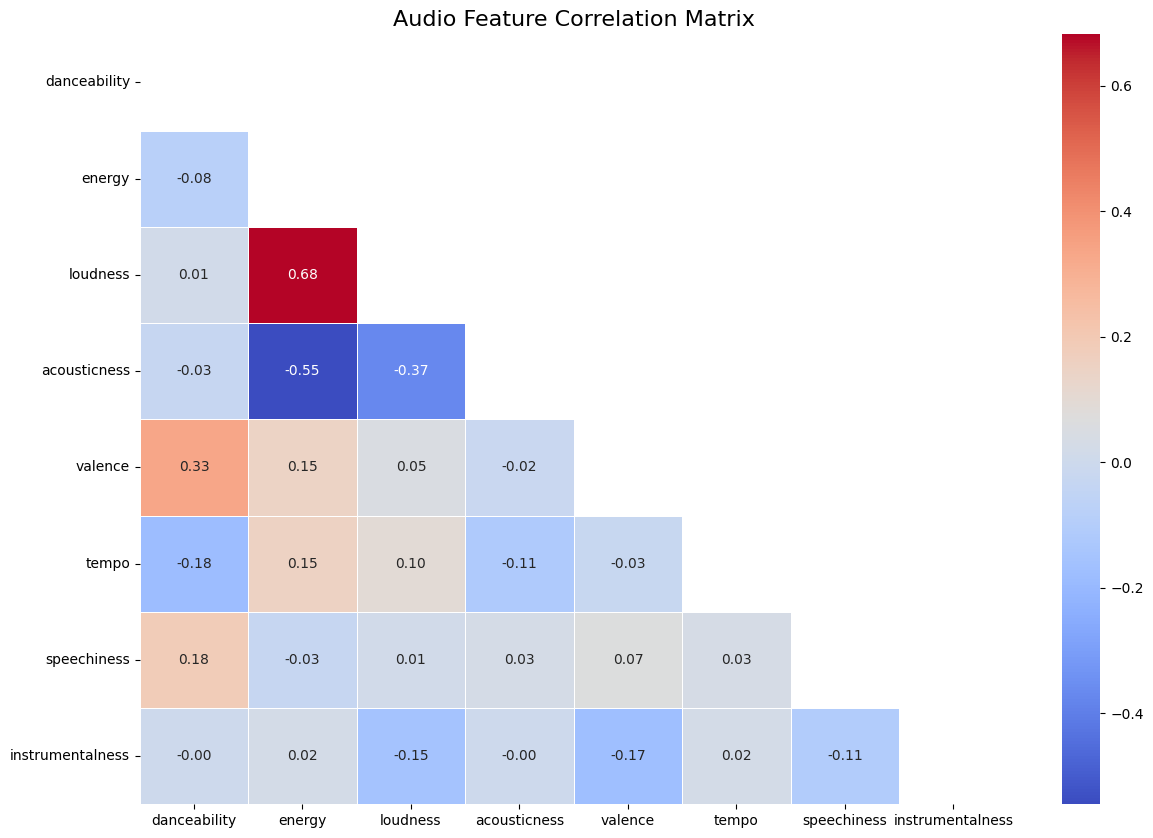

In [47]:

# Feature Correlation Matrix
plt.figure(figsize=(14, 10))
audio_features = ['danceability', 'energy', 'loudness',
                 'acousticness', 'valence', 'tempo',
                 'speechiness', 'instrumentalness']
corr_matrix = data[audio_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap="coolwarm", linewidths=0.5)
plt.title("Audio Feature Correlation Matrix", fontsize=16)
plt.show()


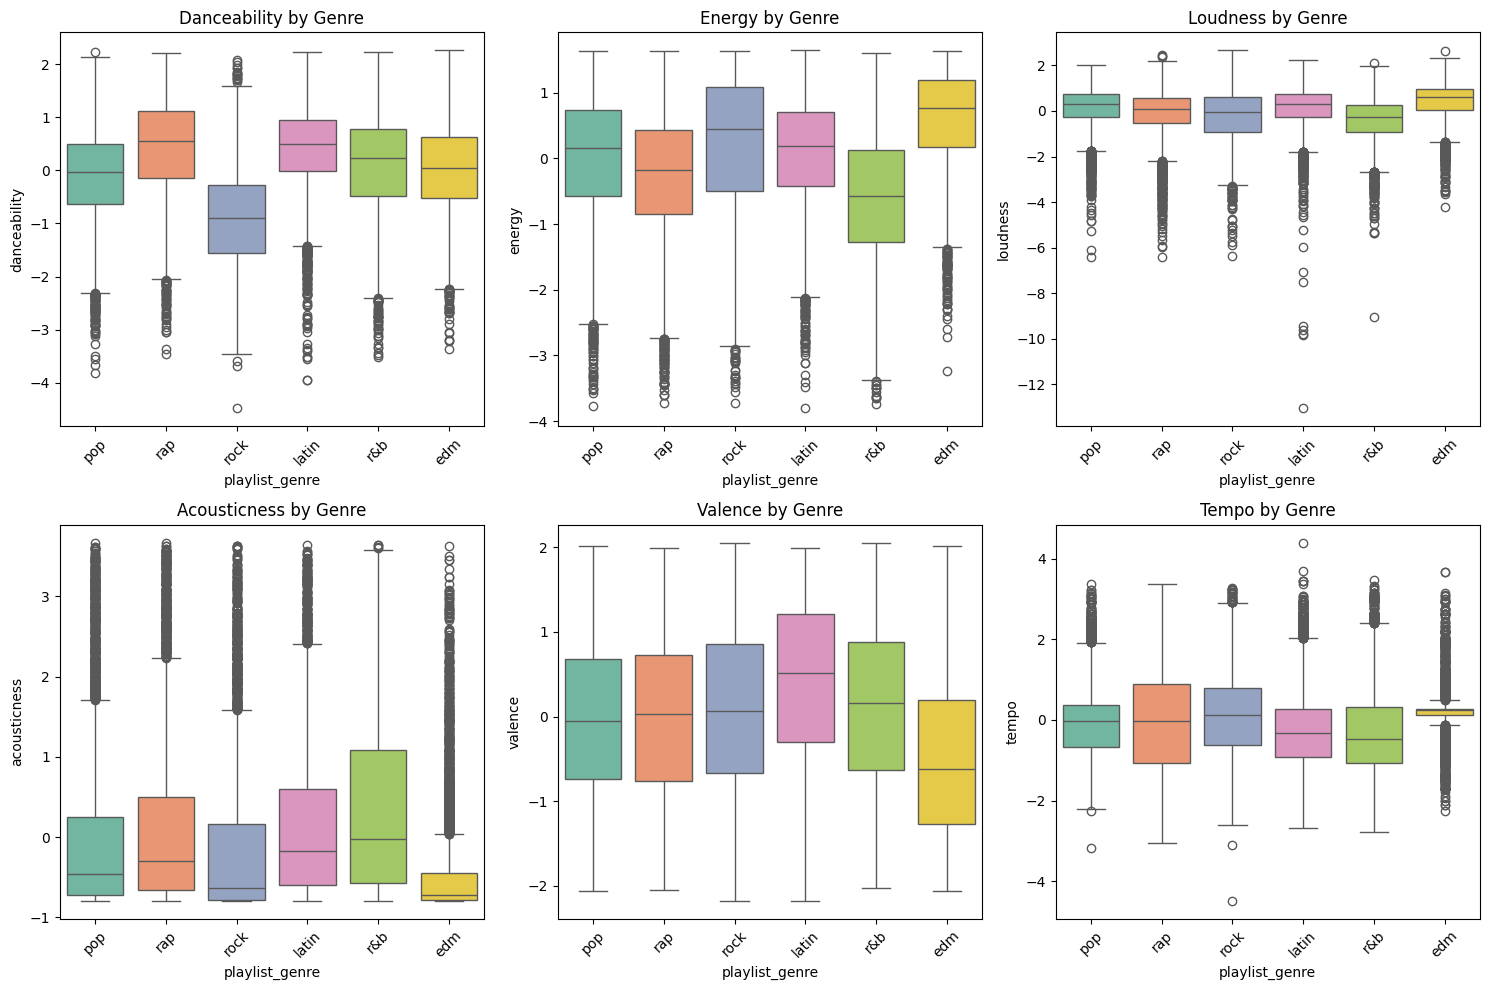

In [48]:


# Feature Distribution by Genre (Boxplot)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='playlist_genre', y=feature, data=data, palette="Set2")
    plt.title(f'{feature.capitalize()} by Genre', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:

# Genre Feature Radar Chart (Interactive)
genre_means = data.groupby('playlist_genre')[audio_features].mean().reset_index()

fig = go.Figure()
for genre in genre_means['playlist_genre']:
    fig.add_trace(go.Scatterpolar(
        r=genre_means[genre_means['playlist_genre'] == genre][audio_features].values[0],
        theta=audio_features,
        fill='toself',
        name=genre
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title='Audio Feature Profiles by Genre',
    height=600
)
fig.show()

##Data Preprocessing

In [50]:
# Handle duplicates
data = data.drop_duplicates(subset=['track_id'])

# Fix release dates
def fix_date(x):
    if pd.isnull(x):
        return x
    if isinstance(x, str):
        return f"{x}-01-01" if len(x) < 10 else x
    return x.strftime('%Y-%m-%d')

data['track_album_release_date'] = data['track_album_release_date'].apply(fix_date)
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], errors='coerce')


# Extract release year
data['release_year'] = data['track_album_release_date'].dt.year

# Encode Target Variable
label_encoder = LabelEncoder()
data['genre_label'] = label_encoder.fit_transform(data['playlist_genre'])
print("🎯 Target encoding complete!")
print(label_encoder.classes_)

# Feature Scaling
audio_features += ['duration_ms', 'release_year']
scaler = StandardScaler()
data[audio_features] = scaler.fit_transform(data[audio_features])

🎯 Target encoding complete!
['edm' 'latin' 'pop' 'r&b' 'rap' 'rock']


In [36]:
print(data.isna().sum())
data = data.dropna()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
release_year                0
genre_label                 0
dtype: int64
